1.3.1

<built-in method all of numpy.ndarray object at 0x000001A852E37CF0> <built-in method all of numpy.ndarray object at 0x000001A83AAFEB50>
Расстояние Евклида между точками [0 1 2] , [1 1 1] = 1.4142135623730951
Квадрат Евклидова расстояния между точками [0 1 2] , [1 1 1] = 2.0000000000000004
Расстояние Чебышева между точками [0 1 2] , [1 1 1] = 1.0
Расстояние Хемминга между точками [0 1 2] , [1 1 1] = 2.0 

<built-in method all of numpy.ndarray object at 0x000001A852E37CF0> <built-in method all of numpy.ndarray object at 0x000001A839403750>
Расстояние Евклида между точками [0 1 2] , [4 2 2] = 4.123105625617661
Квадрат Евклидова расстояния между точками [0 1 2] , [4 2 2] = 17.0
Расстояние Чебышева между точками [0 1 2] , [4 2 2] = 4.0
Расстояние Хемминга между точками [0 1 2] , [4 2 2] = 5.0 

<built-in method all of numpy.ndarray object at 0x000001A852E37CF0> <built-in method all of numpy.ndarray object at 0x000001A837343870>
Расстояние Евклида между точками [0 1 2] , [3 5 3] = 5.09901951

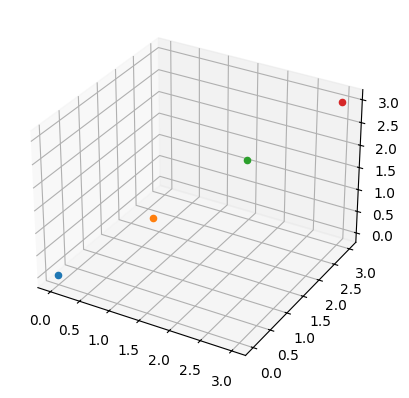

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0,0,0)
ax.scatter(1,1,1)
ax.scatter(2,2,2)
ax.scatter(3,3,3)

x = np.array([0,1,2])
y = np.array([1,1,1])
w = np.array([4,2,2])
z = np.array([3,5,3])

for i in [x,y,w,z]:
    for j in [x,y,w,z]:
        if i.tolist()!= j.tolist():
            if i.all()<=j.all():
                print (i.all, j.all)
                print("Расстояние Евклида между точками",i,",",j,"=",np.linalg.norm(i-j))
                print("Квадрат Евклидова расстояния между точками",i,",",j,"=",np.linalg.norm(i-j) ** 2)
                print("Расстояние Чебышева между точками",i,",",j,"=",np.linalg.norm(i-j, ord=np.inf))
                print("Расстояние Хемминга между точками",i,",",j,"=",np.linalg.norm(i-j, ord=1),"\n")
plt.show()

1.3.2

In [10]:
from numpy import arange
Z=np.zeros((5,5))
Z+=np.arange(5)
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


2.3.1

KNeighborsClassifier(n_neighbors=3)
(-2,-2) is class
[0]
(1,3) is class
[1]
Точность при количестве соседей k = 1
 accuracy: 1.0
Точность при количестве соседей k = 5
 accuracy: 1.0
Точность при количестве соседей k = 10
 accuracy: 1.0


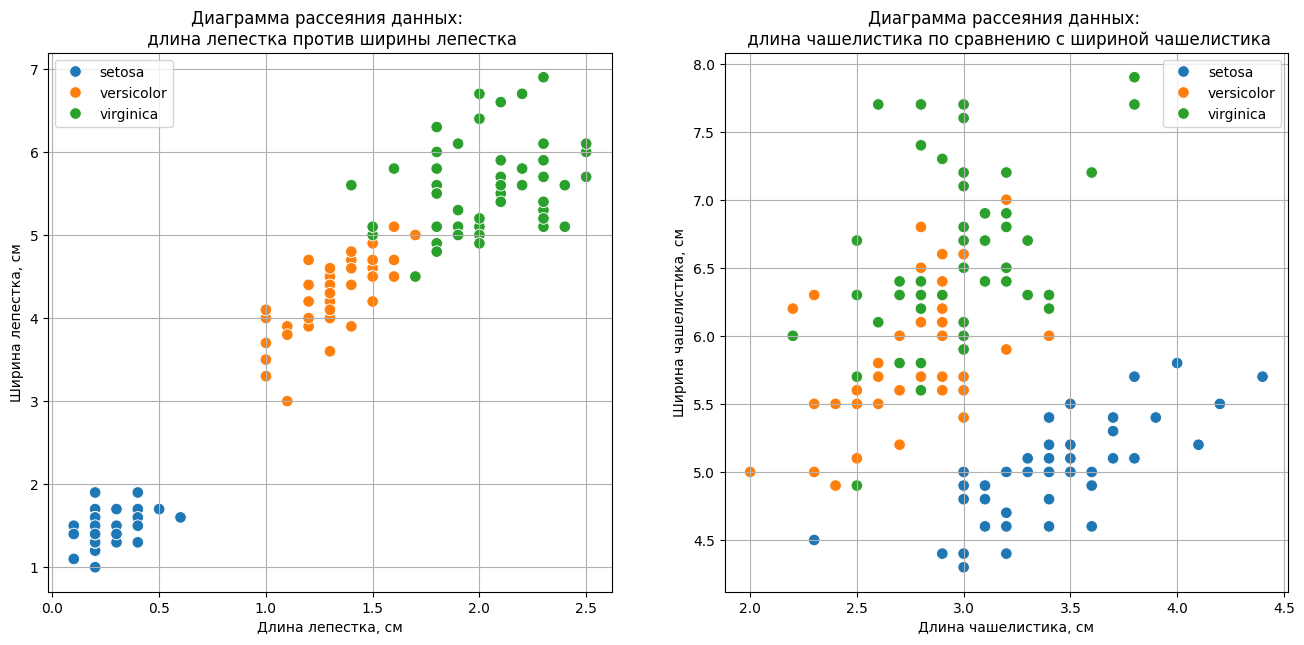

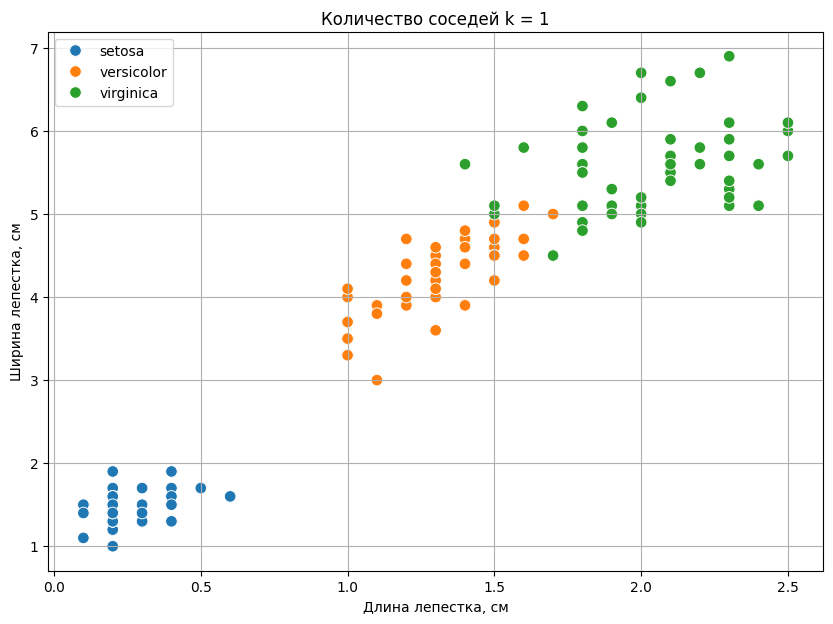

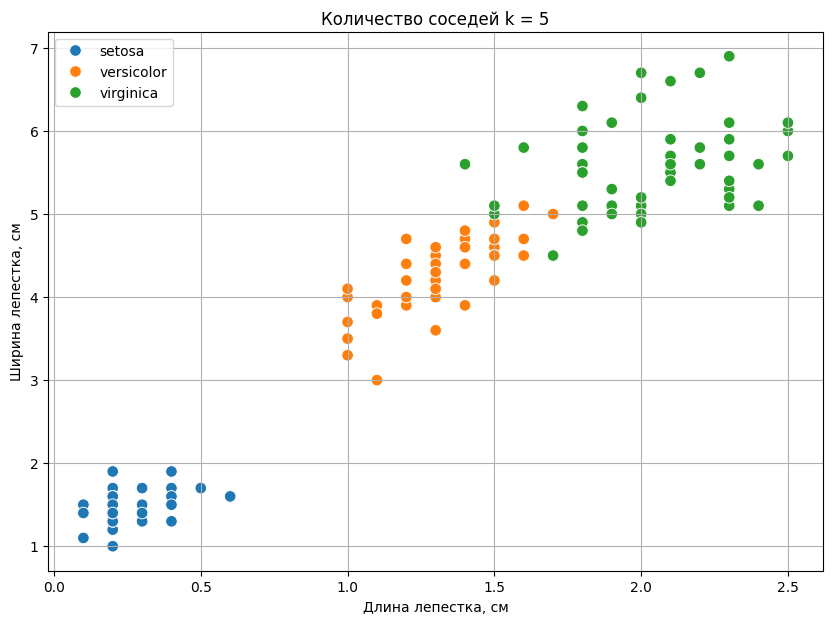

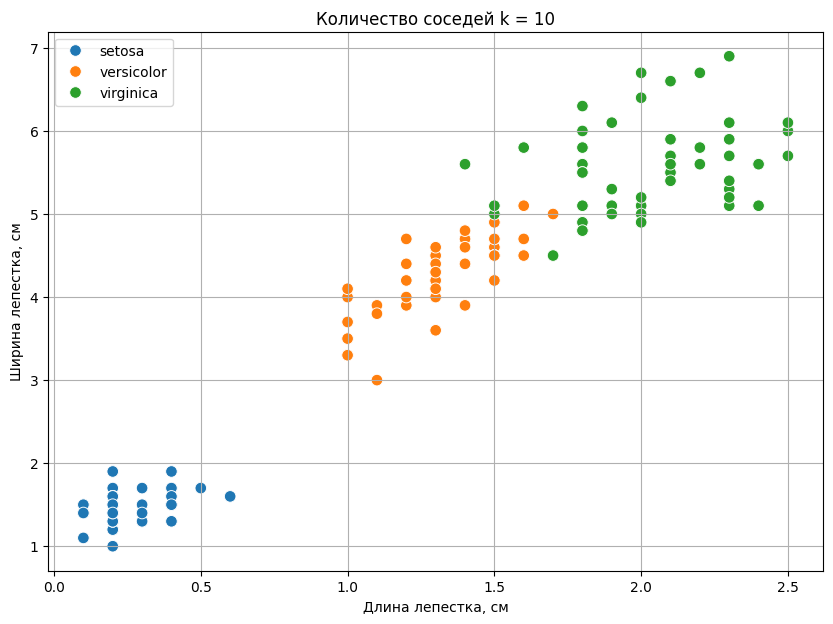

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = sns.load_dataset('iris')
iris

# данные
X= np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = [0, 0, 0, 1, 1, 1]

# обучаем модель k-ближайших соседей к данным
K = 3
model = KNeighborsClassifier(n_neighbors = K)
model.fit(X, target)
print(model)

# делаем прогноз
print( '(-2,-2) is class'),
print( model.predict([[-2,-2]]) )

print( '(1,3) is class'),
print( model.predict([[1,3]]) )


iris = sns.load_dataset('iris')
iris

# Объявляем фигуру из двух графиков и ее размер
plt.figure(figsize=(16, 7))
# Левый график
plt.subplot(121)

sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species', s=70) 
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend() # добавить легенду
plt.grid() # добавить сетку
plt.title("Диаграмма рассеяния данных: \n длина лепестка против ширины лепестка")
# Правый график аналогично
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species', s=70)
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Ширина чашелистика, см')
plt.legend()
plt.grid();
plt.title("Диаграмма рассеяния данных: \n длина чашелистика по сравнению с шириной чашелистика")


X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1],test_size = 0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()
#Обучим метод трех ближайших соседей #1
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
#Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()
plt.title("Количество соседей k = 1")

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print("Точность при количестве соседей k = 1")
print(f' accuracy: {accuracy_score(y_test, y_pred) :.3}')
#5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
#Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()
plt.title("Количество соседей k = 5")

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print("Точность при количестве соседей k = 5")
print(f' accuracy: {accuracy_score(y_test, y_pred) :.3}')
#10
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
#Получим предсказания модели
y_pred = model.predict(X_test)
y_pred

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species', s=70)
plt.plot(label="Количество соседей k = 10")
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()
plt.title("Количество соседей k = 10")
for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
print("Точность при количестве соседей k = 10")
print(f' accuracy: {accuracy_score(y_test, y_pred) :.3}')

3.3.2

In [12]:
from sklearn.feature_extraction import DictVectorizer
#цвет глаз:
data_dict = [{"зеленый": 0, "коричневый": 1, "синий": 0},{"зеленый": 1, "коричневый": 0, "синий":0},{"зеленый": 0, "коричневый": 1, "синий": 0},{"коричневый": 0, "зеленый": 0, "синий": 1}]

dictvectorizer = DictVectorizer(sparse=False)

features = dictvectorizer.fit_transform(data_dict)
features

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])